# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:

path = 'C:/Users/EORTIZ/MACHINE LEARNING UDACITY/Project Identify Costumer Segments'

# Load in the general demographics data.
azdias = pd.read_csv(path +'/Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info =  pd.read_csv(path +'/AZDIAS_Feature_Summary.csv', sep=';') 

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print(azdias.shape)
azdias.head()

(891221, 85)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

In [5]:
feat_info['type'].value_counts()

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [6]:
azdias['AGER_TYP'].value_counts()

-1    677503
 2     98472
 1     79802
 3     27104
 0      8340
Name: AGER_TYP, dtype: int64

In [7]:
feat_info['missing_or_unknown']

0       [-1,0]
1     [-1,0,9]
2       [-1,0]
3          [0]
4         [-1]
        ...   
80        [-1]
81        [-1]
82      [-1,9]
83      [-1,0]
84      [-1,9]
Name: missing_or_unknown, Length: 85, dtype: object

In [8]:
# Identify missing or unknown data values and convert them to NaNs.

for var in range(len(feat_info)):
    missing_or_unknown = feat_info.iloc[var]['missing_or_unknown']
    missing_or_unknown = missing_or_unknown.strip('[')
    missing_or_unknown = missing_or_unknown.strip(']')
    missing_or_unknown = missing_or_unknown.split(sep=',')
    missing_or_unknown = [int(value) if (value!='X' and value!='XX' and value!='') else value for value in missing_or_unknown]
    if missing_or_unknown != ['']:
        azdias = azdias.replace({feat_info.iloc[var]['attribute']: missing_or_unknown}, np.nan)

azdias['AGER_TYP'].value_counts(dropna=False)

NaN    685843
2.0     98472
1.0     79802
3.0     27104
Name: AGER_TYP, dtype: int64

In [9]:
#column_list = azdias.columns.to_list()
#feat_info.set_index('attribute', inplace=True)
# Identify missing or unknown data values and convert them to NaNs.
#for colum_name in column_list:
#    azdias[colum_name] = azdias[colum_name].apply(lambda x: np.nan if str(x) in feat_info.loc[colum_name].missing_or_unknown else x)

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [10]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

features = azdias.columns.to_list()
missing = []
for col in features:
        missing.append(azdias[col].isnull().sum() * 100 / len(azdias))
        
missing=pd.DataFrame({'column_name': features,'percent_missing': missing})
missing.sort_values('percent_missing',ascending=False, inplace=True)
missing

,column_name,percent_missing
40,TITEL_KZ,99.757636
0,AGER_TYP,76.955435
47,KK_KUNDENTYP,65.596749
64,KBA05_BAUMAX,53.468668
11,GEBURTSJAHR,44.020282
...,...,...
32,SEMIO_RAT,0.000000
33,SEMIO_KRIT,0.000000
34,SEMIO_DOM,0.000000
37,SEMIO_TRADV,0.000000


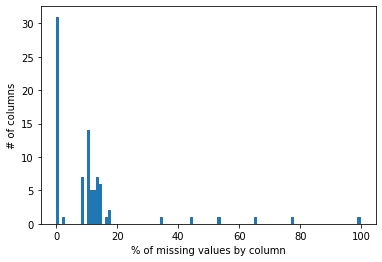

In [11]:
plt.hist(missing['percent_missing'], bins=100)
plt.ylabel('# of columns')
plt.xlabel('% of missing values by column')
plt.show()

In [12]:
# Investigate patterns in the amount of missing data in each column.
missing['percent_missing'].describe()

count    85.000000
mean     11.054139
std      16.449815
min       0.000000
25%       0.000000
50%      10.451729
75%      13.073637
max      99.757636
Name: percent_missing, dtype: float64

In [13]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
feature_drop = missing['column_name'][missing['percent_missing'] > 15].tolist() #Seleccionar columnas
feature_drop

['TITEL_KZ',
 'AGER_TYP',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'GEBURTSJAHR',
 'ALTER_HH',
 'KKK',
 'REGIOTYP',
 'W_KEIT_KIND_HH']

In [14]:
azdias.drop(columns=feature_drop , inplace=True)
azdias.reset_index(drop=True,inplace=True)
azdias.shape

(891221, 76)

#### Discussion 1.1.2: Assess Missing Data in Each Column

As we can see 75% of the columns database have less than 13.073637 missing data. To remove the outliers columns we set 15% of missing value as a cut point removing 'TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'ALTER_HH', 'KKK', 'REGIOTYP'and
 'W_KEIT_KIND_HH'.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

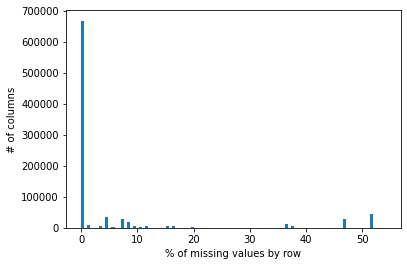

In [15]:
# How much data is missing in each row of the dataset?

missing_rows = []

missing_rows = azdias.isnull().sum(axis=1) * 100 / len(feat_info)
missing_rows.sort_values(ascending=False, inplace=True)        

plt.hist(missing_rows, bins=100)
plt.ylabel('# of columns')
plt.xlabel('% of missing values by row')
plt.show()

In [16]:
missing_rows.describe()

count    891221.000000
mean          6.034270
std          14.549330
min           0.000000
25%           0.000000
50%           0.000000
75%           1.176471
max          54.117647
dtype: float64

In [17]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

azdias_under = azdias[(azdias.isnull().sum(axis=1) * 100 / len(feat_info)) <= 2]
azdias_over = azdias[(azdias.isnull().sum(axis=1) * 100 / len(feat_info)) > 2]
print(azdias_under.shape)

(677466, 76)


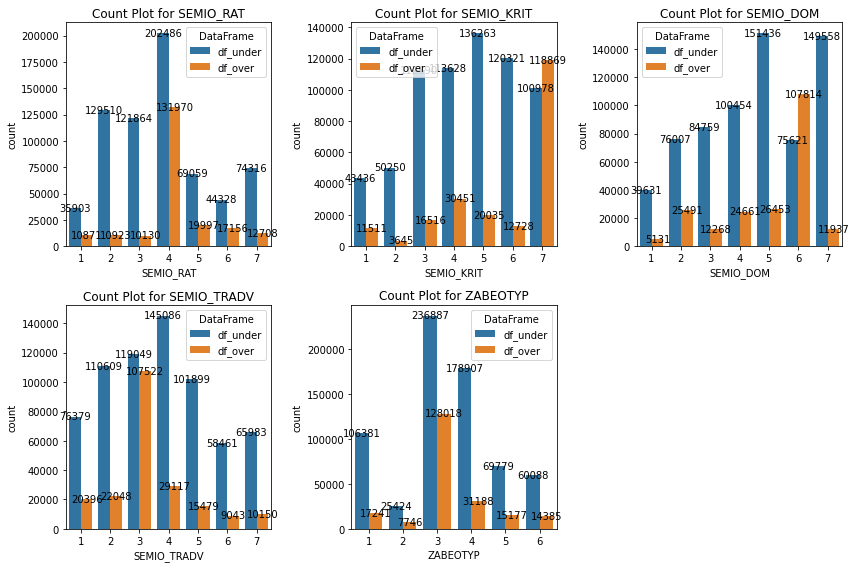

In [18]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# Combine the DataFrames
combined_df = pd.concat([azdias_under.assign(DataFrame='df_under'), azdias_over.assign(DataFrame='df_over')])


plot_list =    ['SEMIO_RAT',
                'SEMIO_KRIT',
                'SEMIO_DOM',
                'SEMIO_TRADV',
                'ZABEOTYP']

# Create count plots using seaborn with count labels
plt.figure(figsize=(12, 8))
for i, column in enumerate(plot_list):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=combined_df, x=column, hue='DataFrame')
    plt.title(f'Count Plot for {column}')
    # Display count labels on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.tight_layout()
plt.show()

#### Discussion 1.1.3: Assess Missing Data in Each Row

The distributions of values in the previous countplots charts between the two datasets in the five features i choose are different.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [19]:
# How many features are there of each data type?
feat_info = feat_info[feat_info['attribute'].isin(azdias_under.columns.to_list())]
feat_info['type'].value_counts()

ordinal        46
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [20]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
categorical_features = feat_info[feat_info["type"]=="categorical"]["attribute"]
categorical_features

2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
39             SOHO_KZ
41            VERS_TYP
42            ZABEOTYP
52         GEBAEUDETYP
55         OST_WEST_KZ
57     CAMEO_DEUG_2015
58      CAMEO_DEU_2015
Name: attribute, dtype: object

In [21]:
for column in categorical_features:
    print(azdias[column].value_counts(dropna=False))

2    465305
1    425916
Name: ANREDE_KZ, dtype: int64
4.0    210963
3.0    156449
6.0    153915
2.0    148795
5.0    117376
1.0     98869
NaN      4854
Name: CJT_GESAMTTYP, dtype: int64
6    290367
1    199572
4    130625
2    110867
5    106436
3     53354
Name: FINANZTYP, dtype: int64
12.0    138545
5.0     120126
10.0    109127
8.0      88042
11.0     79740
4.0      63770
9.0      60614
3.0      56007
1.0      53600
2.0      46702
7.0      42956
6.0      27138
NaN       4854
Name: GFK_URLAUBERTYP, dtype: int64
0    715996
1    175225
Name: GREEN_AVANTGARDE, dtype: int64
1.0     426379
10.0    137913
2.0     104305
NaN      77792
11.0     51719
8.0      23032
7.0      20730
4.0      12303
5.0      11920
9.0      11148
6.0       9022
3.0       4958
Name: LP_FAMILIE_FEIN, dtype: int64
1.0    426379
5.0    200780
2.0    104305
NaN     77792
4.0     52784
3.0     29181
Name: LP_FAMILIE_GROB, dtype: int64
1.0     219275
9.0     143238
2.0     118236
10.0    118022
4.0      78317
5.0      

In [22]:
#drop rows that have a NaN value
azdias.dropna(subset=categorical_features , inplace = True)
azdias.reset_index(drop=True, inplace=True)

In [23]:
azdias.shape

(725836, 76)

In [24]:
for column in categorical_features:
    print(azdias[column].value_counts(dropna=False))

2    371981
1    353855
Name: ANREDE_KZ, dtype: int64
4.0    186910
3.0    139689
2.0    128835
5.0     91931
6.0     91523
1.0     86948
Name: CJT_GESAMTTYP, dtype: int64
6    271516
1    167047
2     97322
5     97251
4     50917
3     41783
Name: FINANZTYP, dtype: int64
12.0    115587
10.0     93648
8.0      78082
11.0     68764
5.0      65890
4.0      56212
9.0      51691
3.0      48184
1.0      46149
2.0      40500
7.0      37488
6.0      23641
Name: GFK_URLAUBERTYP, dtype: int64
0    560855
1    164981
Name: GREEN_AVANTGARDE, dtype: int64
1.0     377519
10.0    123496
2.0      93339
11.0     47062
8.0      21107
7.0      18773
4.0      11067
5.0      10819
9.0      10097
6.0       8139
3.0       4418
Name: LP_FAMILIE_FEIN, dtype: int64
1.0    377519
5.0    180655
2.0     93339
4.0     48019
3.0     26304
Name: LP_FAMILIE_GROB, dtype: int64
1.0     192397
9.0     127841
10.0    106179
2.0      90343
4.0      68091
3.0      64986
6.0      27517
5.0      23949
8.0      15762
7.0    

In [25]:
from sklearn.preprocessing import OneHotEncoder
# Re-encode categorical variable(s) to be kept in the analysis.

enc = OneHotEncoder(drop='first').fit(azdias[categorical_features])
df_categorical_enc = enc.transform(azdias[categorical_features]).toarray()
categorical_one_hot = enc.get_feature_names_out(categorical_features)
print(categorical_one_hot)
df_categorical_enc =pd.DataFrame(df_categorical_enc, columns=categorical_one_hot)
df_categorical_enc

['ANREDE_KZ_2' 'CJT_GESAMTTYP_2.0' 'CJT_GESAMTTYP_3.0' 'CJT_GESAMTTYP_4.0'
 'CJT_GESAMTTYP_5.0' 'CJT_GESAMTTYP_6.0' 'FINANZTYP_2' 'FINANZTYP_3'
 'FINANZTYP_4' 'FINANZTYP_5' 'FINANZTYP_6' 'GFK_URLAUBERTYP_2.0'
 'GFK_URLAUBERTYP_3.0' 'GFK_URLAUBERTYP_4.0' 'GFK_URLAUBERTYP_5.0'
 'GFK_URLAUBERTYP_6.0' 'GFK_URLAUBERTYP_7.0' 'GFK_URLAUBERTYP_8.0'
 'GFK_URLAUBERTYP_9.0' 'GFK_URLAUBERTYP_10.0' 'GFK_URLAUBERTYP_11.0'
 'GFK_URLAUBERTYP_12.0' 'GREEN_AVANTGARDE_1' 'LP_FAMILIE_FEIN_2.0'
 'LP_FAMILIE_FEIN_3.0' 'LP_FAMILIE_FEIN_4.0' 'LP_FAMILIE_FEIN_5.0'
 'LP_FAMILIE_FEIN_6.0' 'LP_FAMILIE_FEIN_7.0' 'LP_FAMILIE_FEIN_8.0'
 'LP_FAMILIE_FEIN_9.0' 'LP_FAMILIE_FEIN_10.0' 'LP_FAMILIE_FEIN_11.0'
 'LP_FAMILIE_GROB_2.0' 'LP_FAMILIE_GROB_3.0' 'LP_FAMILIE_GROB_4.0'
 'LP_FAMILIE_GROB_5.0' 'LP_STATUS_FEIN_2.0' 'LP_STATUS_FEIN_3.0'
 'LP_STATUS_FEIN_4.0' 'LP_STATUS_FEIN_5.0' 'LP_STATUS_FEIN_6.0'
 'LP_STATUS_FEIN_7.0' 'LP_STATUS_FEIN_8.0' 'LP_STATUS_FEIN_9.0'
 'LP_STATUS_FEIN_10.0' 'LP_STATUS_GROB_2.0' 'LP_STATUS_GRO

,ANREDE_KZ_2,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725831,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
725832,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
725833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
725834,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
azdias.drop(columns = categorical_features ,axis=1, inplace = True)
azdias = pd.concat([df_categorical_enc, azdias], ignore_index=False,axis=1)

In [27]:
azdias

,ANREDE_KZ_2,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725831,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,3.0,2.0,5.0,5.0,2.0,3.0,7.0,3.0
725832,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,1.0,2.0,4.0,4.0,2.0,5.0,2.0
725833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
725834,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0


In [28]:
azdias.info(max_cols=180)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725836 entries, 0 to 725835
Data columns (total 178 columns):
 #    Column                 Non-Null Count   Dtype  
---   ------                 --------------   -----  
 0    ANREDE_KZ_2            725836 non-null  float64
 1    CJT_GESAMTTYP_2.0      725836 non-null  float64
 2    CJT_GESAMTTYP_3.0      725836 non-null  float64
 3    CJT_GESAMTTYP_4.0      725836 non-null  float64
 4    CJT_GESAMTTYP_5.0      725836 non-null  float64
 5    CJT_GESAMTTYP_6.0      725836 non-null  float64
 6    FINANZTYP_2            725836 non-null  float64
 7    FINANZTYP_3            725836 non-null  float64
 8    FINANZTYP_4            725836 non-null  float64
 9    FINANZTYP_5            725836 non-null  float64
 10   FINANZTYP_6            725836 non-null  float64
 11   GFK_URLAUBERTYP_2.0    725836 non-null  float64
 12   GFK_URLAUBERTYP_3.0    725836 non-null  float64
 13   GFK_URLAUBERTYP_4.0    725836 non-null  float64
 14   GFK_URLAUBERTYP_5.

#### Discussion 1.2.1: Re-Encode Categorical Features

What I did for encode the categorical features was use the sklearn function OneHotEconder with the condition drop=first, this means that if the feature is dummy didn´t change but if is multi-label drop the first level because the others label explain the drop label. Also I droped rows that had any missing value in categorical feature because impute values without a context could damage the data.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [29]:
mixed_features = feat_info[feat_info["type"]=="mixed"]["attribute"]
mixed_features

15      LP_LEBENSPHASE_FEIN
16      LP_LEBENSPHASE_GROB
22    PRAEGENDE_JUGENDJAHRE
56                 WOHNLAGE
59          CAMEO_INTL_2015
79              PLZ8_BAUMAX
Name: attribute, dtype: object

In [30]:
#drop rows that have a NaN value
azdias.dropna(subset=mixed_features , inplace = True)

for column in mixed_features:
    print(azdias[column].value_counts(dropna=False))

1.0     55904
5.0     50157
6.0     37365
2.0     35397
8.0     25741
7.0     23881
29.0    23782
13.0    23518
11.0    23042
10.0    21858
31.0    21028
30.0    20190
12.0    19393
15.0    17906
3.0     17605
19.0    17121
37.0    16641
20.0    15746
4.0     15656
14.0    15255
32.0    14982
39.0    14760
40.0    13814
16.0    12967
35.0    12502
27.0    12328
38.0    12153
34.0    11730
21.0    11213
9.0     11158
28.0    10849
24.0    10371
36.0     9295
25.0     9154
23.0     7745
22.0     6435
18.0     5850
33.0     5520
17.0     5186
26.0     3171
Name: LP_LEBENSPHASE_FEIN, dtype: int64
2.0     137144
1.0     124562
3.0      98969
12.0     66663
4.0      46128
9.0      43972
5.0      43903
10.0     36010
11.0     29752
8.0      26348
6.0      25393
7.0      19525
Name: LP_LEBENSPHASE_GROB, dtype: int64
14.0    164890
8.0     129020
10.0     78105
5.0      77294
3.0      48507
15.0     38248
11.0     32695
9.0      31364
6.0      23932
12.0     22721
4.0      19097
1.0      16989


In [31]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
azdias['DECADE'] = azdias['PRAEGENDE_JUGENDJAHRE']
azdias['MOVEMENT'] = azdias['PRAEGENDE_JUGENDJAHRE']

dec_replace = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
mov_replace = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}

In [32]:
azdias['DECADE'].replace(dec_replace, inplace=True)
azdias['MOVEMENT'].replace(mov_replace, inplace=True)

azdias['MOVEMENT'].value_counts()

1.0    537526
0.0    160843
Name: MOVEMENT, dtype: int64

In [33]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias['WEALTH'] = azdias['CAMEO_INTL_2015']
azdias['LIFE_STAGE'] = azdias['CAMEO_INTL_2015']

# Replace list
w_replace = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,'31':3, '32':3, '33':3, '34':3,
             '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,'51':5, '52':5, '53':5, '54':5, '55':5}

ls_replace = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,'31':1, '32':2, '33':3, '34':4,
              '35':5, '41':1, '42':2, '43':3, '44':4, '45':5, '51':1, '52':2, '53':3, '54':4, '55':5}

In [34]:
azdias['WEALTH'].replace(w_replace, inplace=True)
azdias['LIFE_STAGE'].replace(ls_replace, inplace=True)

In [35]:
azdias['WEALTH'].value_counts()

5    192282
2    170190
4    167910
1    108498
3     59489
Name: WEALTH, dtype: int64

#### Discussion 1.2.2: Engineer Mixed-Type Features

In first place, I kept the original mixed features 'PRAEGENDE_JUGENDJAHRE' and 'CAMEO_INTL_2015' . For the first feature I created two new variables for capture the two dimensions: an interval-type variable for decade, and a binary variable for movement. Also for the second mixed feature I created  two new ordinal variables for wealth and life stage.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [36]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

#Not Neccesary

In [37]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
azdias.drop(columns=['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015'],axis=1,inplace=True)

In [38]:
azdias.info(max_cols=181)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698369 entries, 0 to 725835
Data columns (total 180 columns):
 #    Column                 Non-Null Count   Dtype  
---   ------                 --------------   -----  
 0    ANREDE_KZ_2            698369 non-null  float64
 1    CJT_GESAMTTYP_2.0      698369 non-null  float64
 2    CJT_GESAMTTYP_3.0      698369 non-null  float64
 3    CJT_GESAMTTYP_4.0      698369 non-null  float64
 4    CJT_GESAMTTYP_5.0      698369 non-null  float64
 5    CJT_GESAMTTYP_6.0      698369 non-null  float64
 6    FINANZTYP_2            698369 non-null  float64
 7    FINANZTYP_3            698369 non-null  float64
 8    FINANZTYP_4            698369 non-null  float64
 9    FINANZTYP_5            698369 non-null  float64
 10   FINANZTYP_6            698369 non-null  float64
 11   GFK_URLAUBERTYP_2.0    698369 non-null  float64
 12   GFK_URLAUBERTYP_3.0    698369 non-null  float64
 13   GFK_URLAUBERTYP_4.0    698369 non-null  float64
 14   GFK_URLAUBERTYP_5.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [79]:
def clean_data(df,feat_info):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for var in range(len(feat_info)):
            missing_or_unknown = feat_info.iloc[var]['missing_or_unknown']
            missing_or_unknown = missing_or_unknown.strip('[')
            missing_or_unknown = missing_or_unknown.strip(']')
            missing_or_unknown = missing_or_unknown.split(sep=',')
            missing_or_unknown = [int(value) if (value!='X' and value!='XX' and value!='') else value for value in missing_or_unknown]
            if missing_or_unknown != ['']:
                df = df.replace({feat_info.iloc[var]['attribute']: missing_or_unknown}, np.nan)
    
    # remove selected columns and rows, ...
    feature_drop = ['TITEL_KZ',
                     'AGER_TYP',
                     'KK_KUNDENTYP',
                     'KBA05_BAUMAX',
                     'GEBURTSJAHR',
                     'ALTER_HH',
                     'KKK',
                     'REGIOTYP',
                     'W_KEIT_KIND_HH']
    
    df.drop(columns=feature_drop , inplace=True)
    df.reset_index(drop=True,inplace=True)
    
    # select, re-encode, and engineer column values.
    categorical_features = feat_info[feat_info["type"]=="categorical"]["attribute"]
    df.dropna(subset=categorical_features , inplace = True)
    
    encoding = OneHotEncoder(drop='first').fit(df[categorical_features])
    df_categorical = encoding.transform(df[categorical_features]).toarray()
    categorical_one_names = encoding.get_feature_names_out(categorical_features)
    df_categorical = pd.DataFrame(df_categorical, columns=categorical_one_names)
    df_categorical.reset_index(drop=True,inplace=True)
    
    df.drop(columns = categorical_features ,axis=1, inplace = True)
    df = pd.concat([df_categorical, df], ignore_index=False,axis=1)
    
    
    mixed_features = feat_info[feat_info["type"]=="mixed"]["attribute"]
    df.dropna(subset=mixed_features , inplace = True)
    #first mix feature
    df['DECADE'] = df['PRAEGENDE_JUGENDJAHRE']
    df['MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE']

    dec_replace = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
    mov_replace = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}
    
    df['DECADE'].replace(dec_replace, inplace=True)
    df['MOVEMENT'].replace(mov_replace, inplace=True)
    
    #second mix feature
    df['WEALTH'] = df['CAMEO_INTL_2015']
    df['LIFE_STAGE'] = df['CAMEO_INTL_2015']

    # Replace list
    w_replace = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,'31':3, '32':3, '33':3, '34':3,
                 '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,'51':5, '52':5, '53':5, '54':5, '55':5}

    ls_replace = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,'31':1, '32':2, '33':3, '34':4,
                  '35':5, '41':1, '42':2, '43':3, '44':4, '45':5, '51':1, '52':2, '53':3, '54':4, '55':5}

    df['WEALTH'].replace(w_replace, inplace=True)
    df['LIFE_STAGE'].replace(ls_replace, inplace=True)
    df['GEBAEUDETYP_5.0'] = 0
    df.drop(columns=['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015'],axis=1,inplace=True)
    # Return the cleaned dataframe.
    return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [41]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

#ALREADY DONE IN THE BELLOW STEPS FOR CATEGORICAL AND MIXED TYPES
other_features = feat_info[(feat_info["type"]=="ordinal") | (feat_info["type"]=="numeric")]["attribute"]
other_features

1      ALTERSKATEGORIE_GROB
4         FINANZ_MINIMALIST
5             FINANZ_SPARER
6          FINANZ_VORSORGER
7            FINANZ_ANLEGER
8     FINANZ_UNAUFFAELLIGER
9          FINANZ_HAUSBAUER
14               HEALTH_TYP
23           RETOURTYP_BK_S
24                SEMIO_SOZ
25                SEMIO_FAM
26                SEMIO_REL
27                SEMIO_MAT
28               SEMIO_VERT
29               SEMIO_LUST
30                SEMIO_ERL
31               SEMIO_KULT
32                SEMIO_RAT
33               SEMIO_KRIT
34                SEMIO_DOM
35               SEMIO_KAEM
36            SEMIO_PFLICHT
37              SEMIO_TRADV
44             ANZ_PERSONEN
45                ANZ_TITEL
46       HH_EINKOMMEN_SCORE
49           WOHNDAUER_2008
50      ANZ_HAUSHALTE_AKTIV
51             ANZ_HH_TITEL
53              KONSUMNAEHE
54         MIN_GEBAEUDEJAHR
60              KBA05_ANTG1
61              KBA05_ANTG2
62              KBA05_ANTG3
63              KBA05_ANTG4
65                KB

In [42]:
missing_o = []
for col in other_features:
        missing_o.append(azdias[col].isnull().sum() * 100 / len(azdias))
        
missing_o= pd.DataFrame({'column_name': other_features,'percent_missing': missing_o})
missing_o.sort_values('percent_missing',ascending=False, inplace=True)
missing_o[missing_o['percent_missing']>0]

,column_name,percent_missing
71,MOBI_REGIO,3.289235
60,KBA05_ANTG1,3.289235
61,KBA05_ANTG2,3.289235
62,KBA05_ANTG3,3.289235
63,KBA05_ANTG4,3.289235
65,KBA05_GBZ,3.289235
84,RELAT_AB,0.531524
82,ARBEIT,0.531524
83,ORTSGR_KLS9,0.519639
50,ANZ_HAUSHALTE_AKTIV,0.376878


In [43]:
azdias.dropna(subset = other_features, inplace=True)

In [44]:
azdias.shape

(668241, 180)

In [45]:
azdias.info(max_cols=181)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668241 entries, 0 to 725835
Data columns (total 180 columns):
 #    Column                 Non-Null Count   Dtype  
---   ------                 --------------   -----  
 0    ANREDE_KZ_2            668241 non-null  float64
 1    CJT_GESAMTTYP_2.0      668241 non-null  float64
 2    CJT_GESAMTTYP_3.0      668241 non-null  float64
 3    CJT_GESAMTTYP_4.0      668241 non-null  float64
 4    CJT_GESAMTTYP_5.0      668241 non-null  float64
 5    CJT_GESAMTTYP_6.0      668241 non-null  float64
 6    FINANZTYP_2            668241 non-null  float64
 7    FINANZTYP_3            668241 non-null  float64
 8    FINANZTYP_4            668241 non-null  float64
 9    FINANZTYP_5            668241 non-null  float64
 10   FINANZTYP_6            668241 non-null  float64
 11   GFK_URLAUBERTYP_2.0    668241 non-null  float64
 12   GFK_URLAUBERTYP_3.0    668241 non-null  float64
 13   GFK_URLAUBERTYP_4.0    668241 non-null  float64
 14   GFK_URLAUBERTYP_5.

In [46]:
from sklearn.preprocessing import StandardScaler
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
azdias_scaled = scaler.fit_transform(azdias)
azdias_scaled = pd.DataFrame(azdias_scaled, columns=list(azdias))
azdias_scaled.tail(10)

,ANREDE_KZ_2,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
668231,-1.023365,2.133373,-0.488573,-0.588871,-0.384504,-0.375190,-0.384163,-0.20822,-0.277239,-0.395095,...,-0.649652,-0.630255,-0.336262,0.822367,-1.440526,1.413655,-0.223138,0.546833,-1.545828,0.750862
668232,0.977169,-0.468741,-0.488573,-0.588871,2.600755,-0.375190,-0.384163,-0.20822,-0.277239,-0.395095,...,2.090032,1.432471,0.562899,0.822367,-0.135945,1.413655,1.157316,0.546833,1.179690,-1.262236
668233,-1.023365,-0.468741,-0.488573,-0.588871,2.600755,-0.375190,-0.384163,-0.20822,-0.277239,-0.395095,...,-0.649652,-0.630255,-0.336262,-0.181543,1.603496,1.413655,-0.223138,0.546833,0.498311,-1.262236
668234,-1.023365,2.133373,-0.488573,-0.588871,-0.384504,-0.375190,2.603064,-0.20822,-0.277239,-0.395095,...,0.035269,-0.630255,-1.235423,-0.181543,-0.135945,1.413655,-0.223138,0.546833,1.179690,-1.262236
668235,-1.023365,-0.468741,-0.488573,-0.588871,-0.384504,-0.375190,-0.384163,-0.20822,-0.277239,2.531035,...,2.090032,0.401108,-2.134584,-0.181543,1.603496,1.413655,-1.603591,0.546833,1.179690,-1.262236
668236,0.977169,-0.468741,-0.488573,-0.588871,2.600755,-0.375190,-0.384163,-0.20822,-0.277239,-0.395095,...,0.035269,1.432471,1.462061,-0.181543,-0.570805,0.676728,0.467089,-1.828713,-0.183069,0.750862
668237,0.977169,-0.468741,-0.488573,1.698166,-0.384504,-0.375190,-0.384163,-0.20822,-0.277239,-0.395095,...,2.090032,1.432471,-1.235423,-0.181543,0.733776,-0.060199,1.157316,0.546833,-0.864449,0.079829
668238,0.977169,-0.468741,-0.488573,-0.588871,-0.384504,2.665318,-0.384163,-0.20822,-0.277239,-0.395095,...,0.035269,0.401108,0.562899,-1.185453,-0.135945,-0.797126,0.467089,0.546833,-0.183069,-1.262236
668239,-1.023365,-0.468741,2.046777,-0.588871,-0.384504,-0.375190,-0.384163,-0.20822,-0.277239,-0.395095,...,2.090032,-2.692981,-2.134584,0.822367,0.733776,1.413655,1.157316,0.546833,1.179690,-1.262236
668240,-1.023365,-0.468741,-0.488573,-0.588871,-0.384504,-0.375190,-0.384163,-0.20822,-0.277239,-0.395095,...,-0.649652,0.401108,0.562899,-0.181543,-0.570805,1.413655,-1.603591,0.546833,0.498311,0.079829


### Discussion 2.1: Apply Feature Scaling

I droped all the missing values for two reason. The base have a good rows cantity and impute without a bussiness context didn´t make sense. For scaling features all features were scaled using the StandardScaler.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [47]:
from sklearn.decomposition import PCA
# Apply PCA to the data.
pca = PCA(random_state=201)
pca.fit(azdias_scaled)

PCA(random_state=201)

In [48]:
print(pca.explained_variance_ratio_)

[8.43618436e-02 6.05915569e-02 3.76696079e-02 2.98456801e-02
 2.18386994e-02 1.65086937e-02 1.51761141e-02 1.40760552e-02
 1.37217996e-02 1.29048845e-02 1.27276839e-02 1.25188743e-02
 1.24031747e-02 1.23815258e-02 1.19524074e-02 1.16078128e-02
 1.15298599e-02 1.13882660e-02 1.10144598e-02 1.05944378e-02
 1.00280435e-02 9.90360589e-03 9.20146035e-03 8.92551544e-03
 8.14158489e-03 7.92993180e-03 7.71664759e-03 7.70058950e-03
 7.32442218e-03 7.28377763e-03 7.18366221e-03 7.08938952e-03
 6.91984758e-03 6.72242784e-03 6.66702098e-03 6.60833942e-03
 6.47628508e-03 6.38803044e-03 6.32615067e-03 6.25769968e-03
 6.19317732e-03 6.14867862e-03 6.13995686e-03 6.06609425e-03
 6.00749816e-03 5.97379408e-03 5.96399765e-03 5.92734321e-03
 5.90564099e-03 5.88437082e-03 5.87409551e-03 5.85789932e-03
 5.84449566e-03 5.82904615e-03 5.80848984e-03 5.79984670e-03
 5.79224873e-03 5.77956822e-03 5.76813475e-03 5.76644971e-03
 5.75350453e-03 5.74557736e-03 5.73950457e-03 5.73565394e-03
 5.71958886e-03 5.711310

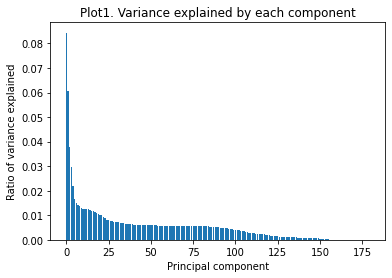

In [49]:
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Plot1. Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

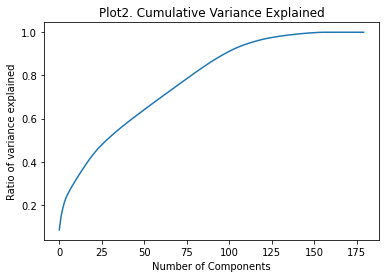

In [50]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Plot2. Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.show()

In [51]:
print("Variance Explainaded =",sum(pca.explained_variance_ratio_*100))

Variance Explainaded = 99.99999999999993


In [52]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_n = PCA(n_components=85)
pca_n = pca_n.fit(azdias_scaled)

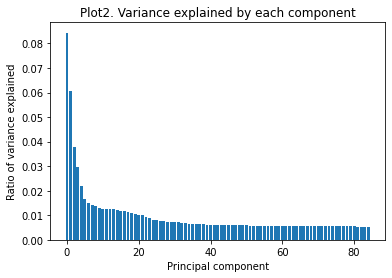

In [53]:
# Investigate the variance accounted for by n first principal component.
plt.bar(range(len(pca_n.explained_variance_ratio_)), pca_n.explained_variance_ratio_)
plt.title("Plot2. Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

In [54]:
print("Variance Explainaded =",sum(pca_n.explained_variance_ratio_*100))

Variance Explainaded = 83.2343978773901


### Discussion 2.2: Perform Dimensionality Reduction

Accordind to the "Plot1. Variance explained by each component" we see two features with high influence in the variance. In the last 100 feaures the plot start to decrease, for this reason i tried to choose n components between 0 and 100. Finally i choose 85 component that explained 82.7& of variance. I reduced de base more 50% of features. 

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [55]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def print_pca_weights(pca, feature_names, n_component):
    # Get the weights for the specified principal component
    weights = pca.components_[n_component - 1]

    # Create a dictionary mapping feature names to weights
    weights_dict = dict(zip(feature_names, weights))

    # Sort the dictionary by weight in descending order taking the absolute value
    sorted_weights = sorted(weights_dict.items(), key=lambda x: abs(x[1]), reverse=True)

    # Print the feature names and corresponding weights
    for feature, weight in sorted_weights:
        print(f"{feature}: {weight}")

In [56]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pd.DataFrame(print_pca_weights(pca_n, list(azdias_scaled.columns), n_component=2))

DECADE: -0.23773717528879657
ALTERSKATEGORIE_GROB: 0.23631820983372165
SEMIO_REL: -0.22705364860390248
FINANZ_SPARER: -0.22327906153626845
FINANZ_VORSORGER: 0.2166000056471631
SEMIO_PFLICHT: -0.21334003434862156
SEMIO_TRADV: -0.2125372502586647
FINANZ_UNAUFFAELLIGER: -0.21252910220929888
FINANZ_ANLEGER: -0.2034034899593724
ZABEOTYP_3: 0.2017625206294518
SEMIO_ERL: 0.19109516848507405
SEMIO_KULT: -0.17613306809269838
SEMIO_RAT: -0.16708198548314634
SEMIO_LUST: 0.16505691420248808
RETOURTYP_BK_S: 0.15939950545843232
ONLINE_AFFINITAET: -0.15796346276927292
SEMIO_FAM: -0.14072482647641466
SEMIO_MAT: -0.13252391263269542
CJT_GESAMTTYP_2.0: 0.1068023052554448
ZABEOTYP_4: -0.1043449620309788
FINANZTYP_5: 0.09725479291471349
FINANZTYP_4: -0.09649051982311714
FINANZ_HAUSBAUER: 0.09565514400730878
ZABEOTYP_5: -0.09044537918362242
LP_STATUS_FEIN_2.0: -0.08829047874547674
SEMIO_KRIT: 0.0855151096608993
FINANZTYP_2: 0.08453944033872655
PLZ8_ANTG3: 0.08370313537545203
LP_STATUS_FEIN_5.0: -0.08168893

""


In [57]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print_pca_weights(pca_n, list(azdias_scaled.columns), n_component=3)

ANREDE_KZ_2: -0.3472662137407733
SEMIO_VERT: 0.3276996613737765
SEMIO_KAEM: -0.3129843792056133
SEMIO_DOM: -0.2789812834617854
SEMIO_KRIT: -0.26119650200595235
SEMIO_SOZ: 0.25943853788961907
SEMIO_FAM: 0.2550244534593365
SEMIO_KULT: 0.2448119922487307
SEMIO_ERL: -0.1937874629814533
FINANZ_ANLEGER: -0.16595338985631708
SEMIO_RAT: -0.16447326679100377
FINANZ_MINIMALIST: 0.14483467472271747
FINANZTYP_5: 0.14368254428023344
SEMIO_REL: 0.11257615578919675
SHOPPER_TYP_2.0: -0.10451893181921976
MOVEMENT: -0.09816875056664728
GREEN_AVANTGARDE_1: 0.09816875056664723
RETOURTYP_BK_S: 0.08873169954938075
LP_STATUS_FEIN_2.0: -0.08744768442216706
LP_STATUS_FEIN_4.0: -0.0873722411960569
SEMIO_MAT: 0.07754419329329097
FINANZ_HAUSBAUER: -0.07503797034490114
LP_STATUS_FEIN_10.0: 0.07454197057003346
LP_STATUS_GROB_5.0: 0.07454197057003346
EWDICHTE: 0.07358049101830423
ORTSGR_KLS9: 0.07353979315916727
ZABEOTYP_4: -0.0633680122197575
FINANZ_SPARER: -0.06314082600711343
INNENSTADT: -0.06312748815006264
DECA

### Discussion 2.3: Interpret Principal Components

Looking the second and third principal components and examinining the magnitude and direction of the coefficients for the original variables I conclude that DECADE and SEMIO_REL(Personality typology)  have negative correlation wich mean that decrease together while ALTERSKATEGORIE_GROB(Estimated age). Also I conclude according to the third components that ANREDE_KZ_2(Gender 2: female) and SEMIO_KAEM(combative attitude) have negative correlation wich mean that decrease together while SEMIO_VERT(dreamful). 


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [58]:
azdias_pca = pca_n.transform(azdias_scaled)

In [59]:
from sklearn.cluster import KMeans
# Over a number of different cluster counts...
def kmean_score(df, n_cluster):
    kmeans = KMeans(n_clusters = n_cluster)
    kmeans_fit = kmeans.fit(df)
    score = np.abs(kmeans_fit.score(df))
    return score


    # run k-means clustering on the data and...
scores = []
n_ks = list(range(1,30)) #but you shouldn't need to test for a number of clusters above about 30.
    
    # compute the average within-cluster distances.
    
for n_cluster in n_ks:
    scores.append(kmean_score(azdias_pca, n_cluster))        

Text(0, 0.5, 'SSE')

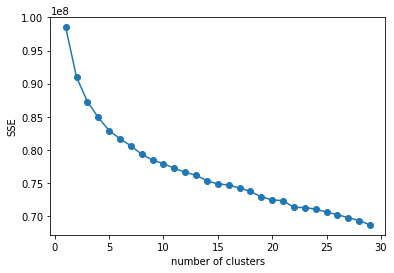

In [60]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(n_ks, scores, linestyle='-', marker='o')
plt.xlabel('number of clusters')
plt.ylabel('SSE')

In [61]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters = 22)
cluster_model = kmeans.fit(azdias_pca)
azdias_predi = cluster_model.predict(azdias_pca)

### Discussion 3.1: Apply Clustering to General Population

Looking the behavior of the plot I choosed 22 clusters beacuse is when the sum of squared errors increase the error in the next  k(23) cluster.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [62]:
## Load in the customer demographics data.
customers = pd.read_csv(path +'/Udacity_CUSTOMERS_Subset.csv', sep=';') 
customers.info(max_cols = 150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               191652 non-null  int64  
 1   ALTERSKATEGORIE_GROB   191652 non-null  int64  
 2   ANREDE_KZ              191652 non-null  int64  
 3   CJT_GESAMTTYP          188439 non-null  float64
 4   FINANZ_MINIMALIST      191652 non-null  int64  
 5   FINANZ_SPARER          191652 non-null  int64  
 6   FINANZ_VORSORGER       191652 non-null  int64  
 7   FINANZ_ANLEGER         191652 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  191652 non-null  int64  
 9   FINANZ_HAUSBAUER       191652 non-null  int64  
 10  FINANZTYP              191652 non-null  int64  
 11  GEBURTSJAHR            191652 non-null  int64  
 12  GFK_URLAUBERTYP        188439 non-null  float64
 13  GREEN_AVANTGARDE       191652 non-null  int64  
 14  HEALTH_TYP             191652 non-nu

In [63]:
feat_info[feat_info['attribute'] == 'GEBAEUDETYP']

,attribute,information_level,type,missing_or_unknown
52,GEBAEUDETYP,building,categorical,"[-1,0]"


In [64]:
customers['GEBAEUDETYP'].value_counts()

1.0    95145
3.0    23655
8.0    20475
2.0     2057
4.0      251
6.0      142
Name: GEBAEUDETYP, dtype: int64

In [84]:
customers_clean = clean_data(customers,feat_info)
customers_clean.dropna(axis=0 , how="any", inplace=True)
customers_clean.head(5)

,ANREDE_KZ_2,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,...,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE,GEBAEUDETYP_5.0
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5.0,5.0,1.0,2.0,1.0,2.0,0.0,1,3,0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,2.0,3.0,5.0,3.0,2.0,0.0,3,4,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,3.0,5.0,1.0,4.0,1.0,4,1,0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,5.0,3.0,7.0,5.0,2.0,0.0,3,4,0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,5.0,2.0,3.0,2.0,2.0,0.0,2,3,0


In [82]:
#customers_clean.info(max_cols = 180)

In [85]:
def reorder_columns(df, reference_df):
    return df[reference_df.columns]

customers_clean = reorder_columns(customers_clean, azdias)
customers_clean.head(5)

,ANREDE_KZ_2,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,5.0,1.0,2.0,1.0,2.0,0.0,1,3
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3.0,2.0,3.0,5.0,3.0,2.0,0.0,3,4
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,3.0,3.0,3.0,5.0,1.0,4.0,1.0,4,1
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,5.0,3.0,7.0,5.0,2.0,0.0,3,4
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,5.0,2.0,3.0,2.0,2.0,0.0,2,3


In [86]:
customers_scaled = scaler.transform(customers_clean)
feature_list = customers_clean.columns.to_list()
customers_scaled = pd.DataFrame(customers_scaled, columns = feature_list)
customers_scaled.head(5)

,ANREDE_KZ_2,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,-1.023365,-0.468741,-0.488573,-0.588871,2.600755,-0.375190,2.603064,-0.20822,-0.277239,-0.395095,...,-0.649652,1.432471,1.462061,-2.189364,-1.440526,-1.534053,-1.603591,-1.828713,-1.545828,0.079829
1,-1.023365,-0.468741,-0.488573,-0.588871,-0.384504,2.665318,2.603064,-0.20822,-0.277239,-0.395095,...,0.720190,-0.630255,-1.235423,-0.181543,-0.135945,-0.060199,-1.603591,-1.828713,-0.183069,0.750862
2,-1.023365,2.133373,-0.488573,-0.588871,-0.384504,-0.375190,2.603064,-0.20822,-0.277239,-0.395095,...,0.035269,-0.630255,-0.336262,-0.181543,-0.135945,-1.534053,-0.223138,0.546833,0.498311,-1.262236
3,-1.023365,2.133373,-0.488573,-0.588871,-0.384504,-0.375190,-0.384163,-0.20822,-0.277239,2.531035,...,-0.649652,1.432471,1.462061,-0.181543,0.733776,1.413655,-1.603591,-1.828713,-0.183069,0.750862
4,0.977169,-0.468741,-0.488573,-0.588871,-0.384504,-0.375190,-0.384163,-0.20822,-0.277239,2.531035,...,-0.649652,1.432471,1.462061,-1.185453,-1.005666,-0.797126,-1.603591,-1.828713,-0.864449,0.079829


In [87]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customer_pca = pca_n.transform(customers_scaled)

customer_predi = cluster_model.predict(customer_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

C:\Anaconda3\envs\CupoIntegral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\envs\CupoIntegral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GeneralClusters')

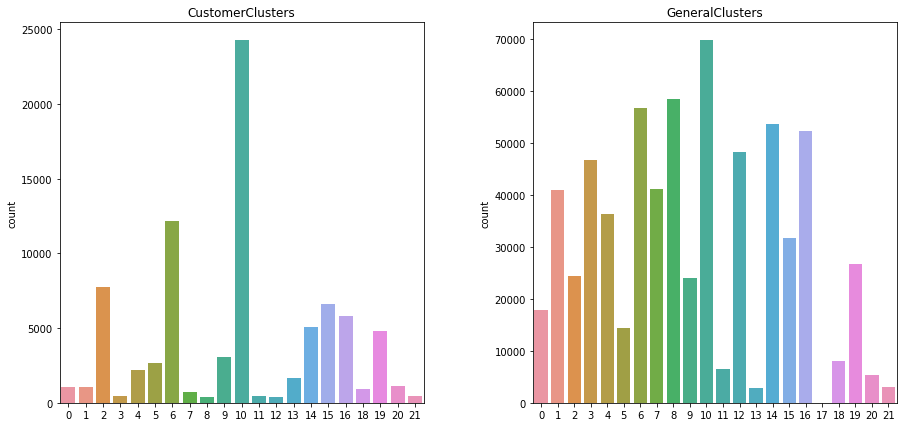

In [130]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,7))
figure.subplots_adjust(hspace = 1, wspace=.3)

sns.countplot(customer_predi, ax=axs[0])
axs[0].set_title('CustomerClusters')
sns.countplot(azdias_predi, ax=axs[1])
axs[1].set_title('GeneralClusters')

In [131]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
cco = pca_n.inverse_transform(cluster_model.cluster_centers_[10])
cco = scaler.inverse_transform((cco.reshape(1, -1)))
cco = pd.Series(data = cco.flatten(), index = customers_clean.columns)
cco

ANREDE_KZ_2          0.500317
CJT_GESAMTTYP_2.0    0.276439
CJT_GESAMTTYP_3.0    0.167594
CJT_GESAMTTYP_4.0    0.192083
CJT_GESAMTTYP_5.0    0.119552
                       ...   
RELAT_AB             2.843220
DECADE               3.536868
MOVEMENT             0.003400
WEALTH               2.023857
LIFE_STAGE           3.638113
Length: 180, dtype: float64

In [132]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
ccunder = pca_n.inverse_transform(cluster_model.cluster_centers_[8])
ccunder = scaler.inverse_transform((ccunder.reshape(1, -1)))
ccunder = pd.Series(data = ccunder.flatten(), index = customers_clean.columns)
ccunder

ANREDE_KZ_2          1.028855
CJT_GESAMTTYP_2.0    0.081707
CJT_GESAMTTYP_3.0    0.254524
CJT_GESAMTTYP_4.0    0.248431
CJT_GESAMTTYP_5.0    0.150556
                       ...   
RELAT_AB             3.685472
DECADE               5.736867
MOVEMENT             0.981082
WEALTH               4.410971
LIFE_STAGE           2.090805
Length: 180, dtype: float64

### Discussion 3.3: Compare Customer Data to Demographics Data

Looking a the Data_Dictionary.md for understand the features a his posible values and also looking the customer base compared to the general population, I conclude using analytic tools like clustering that exist differences between the general population and customers of a mail-order sales company.

I saw clusters overrepresented and underrepresented. For cluster overrepresented we see Cluster 10, that customers data compared to general population data had diferent features distributions. For cluster cluster underrepresented we see Cluster 8.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.